> seaborn(2)--scatterplot, mpl미세먼지팁(2)

# 강의영상 

<https://youtube.com/playlist?list=PLQqh36zP38-xHObhZzebBIEf97Er27O_x>

# import 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

# [sns scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)

`-` data 

In [150]:
x1,y1 =  np.random.multivariate_normal([0,0],[[1,0],[0,1]],size=1000).T
x2,y2 =  np.random.multivariate_normal([2,2],[[1,0.7],[0.7,1]],size=1000).T

- 이변량정규분포에서 샘플추출 (추출코드를 기억할 필요는 없음) 
- 특징: x1,y1은 무상관으로 x2,y2는 선형관계를 가지도록 추출 

## plt 복습

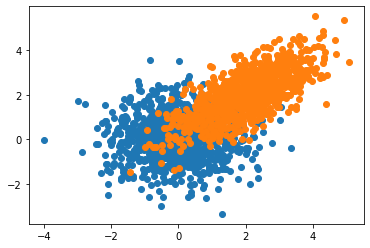

In [151]:
plt.plot(x1,y1,'o')
plt.plot(x2,y2,'o')

## sns: array

<AxesSubplot:>

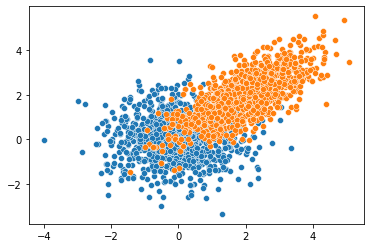

In [152]:
sns.scatterplot(data=None,x=x1,y=y1)
sns.scatterplot(data=None,x=x2,y=y2)

## sns: wide df 

<AxesSubplot:xlabel='x', ylabel='y'>

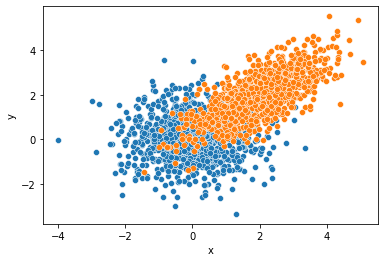

In [153]:
sns.scatterplot(data=pd.DataFrame({'x':x1,'y':y1}),x='x',y='y')
sns.scatterplot(data=pd.DataFrame({'x':x2,'y':y2}),x='x',y='y')
#sns.scatterplot(data=None,x=x2,y=y2)

- 억지로 그리긴 했는데 이 경우는 wide하게 만든 df는 별로 경쟁력이 없음 

## sns: long df 

In [156]:
x= np.concatenate([x1,x2])
y= np.concatenate([y1,y2])
cat = ['x1']*len(x1) + ['x2']*len(x2)
df2 = pd.DataFrame({'x':x,'y':y,'cat':cat})
df2

,x,y,cat
0,2.023919,-0.400176,x1
1,1.229622,-1.763752,x1
2,-0.413211,2.293004,x1
3,-1.343073,0.404232,x1
4,1.062845,0.030775,x1
...,...,...,...
1995,2.226805,3.683857,x2
1996,2.768263,2.678292,x2
1997,2.525295,2.815478,x2
1998,1.750193,2.289812,x2


<AxesSubplot:xlabel='x', ylabel='y'>

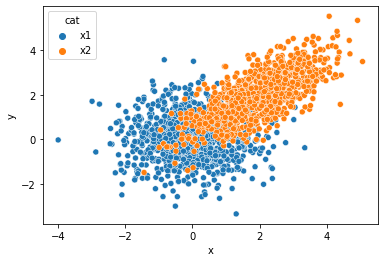

In [157]:
sns.scatterplot(data=df2,x='x',y='y',hue='cat') 

#  sns을 이용하여 matplotlib 액시즈에 그림 그리기 ($\star$)

## 예제1 

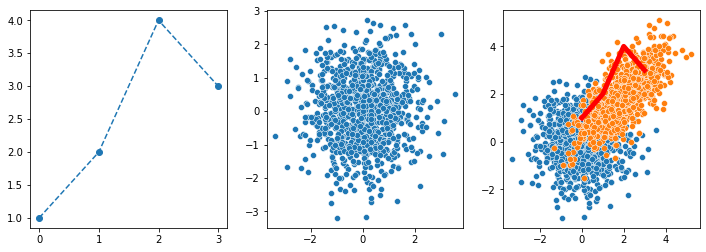

In [91]:
fig,ax = plt.subplots(1,3,figsize=(12,4))
ax[0].plot([1,2,4,3],'--o')
sns.scatterplot(x=x1,y=y1,ax=ax[1])
sns.scatterplot(x=x1,y=y1,ax=ax[2])
sns.scatterplot(x=x2,y=y2,ax=ax[2])
ax[2].plot([1,2,4,3],'-r',lw=5)

## 예제2

In [94]:
import cv2

In [95]:
!wget https://upload.wikimedia.org/wikipedia/commons/0/08/Unequalized_Hawkes_Bay_NZ.jpg 
img = cv2.imread('Unequalized_Hawkes_Bay_NZ.jpg',0)
!rm Unequalized_Hawkes_Bay_NZ.jpg 

--2022-10-05 16:33:56--  https://upload.wikimedia.org/wikipedia/commons/0/08/Unequalized_Hawkes_Bay_NZ.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 110895 (108K) [image/jpeg]
Saving to: ‘Unequalized_Hawkes_Bay_NZ.jpg’

Unequalized_Hawkes_ 100%[===================>] 108.30K   548KB/s    in 0.2s    

2022-10-05 16:33:57 (548 KB/s) - ‘Unequalized_Hawkes_Bay_NZ.jpg’ saved [110895/110895]



In [108]:
img2 = cv2.equalizeHist(img)

In [114]:
img.reshape(-1)

array([127, 145, 149, ..., 146, 145, 144], dtype=uint8)

<AxesSubplot:ylabel='Count'>

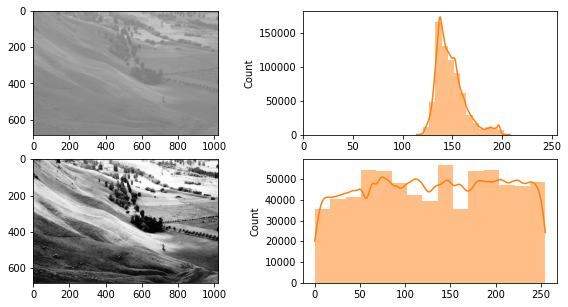

In [125]:
fig,ax = plt.subplots(2,2,figsize=(10,5))
ax[0,0].imshow(img,vmin=0,vmax=255,cmap='gray')
sns.histplot(img.reshape(-1),ax=ax[0,1],bins=15,lw=0,kde=True,color='C1')
ax[0,1].set_xlim(0,255)
ax[1,0].imshow(img2,vmin=0,vmax=255,cmap='gray')
sns.histplot(img2.reshape(-1),ax=ax[1,1],bins=15,lw=0,kde=True,color='C1')

`-` seaborn: figure-level vs axes-level 의 개념

ref: <https://seaborn.pydata.org/tutorial/function_overview.html#figure-level-vs-axes-level-functions>

# mpl 미세먼지팁 (2) 

## 축 간격조정 

In [126]:
import matplotlib as mpl

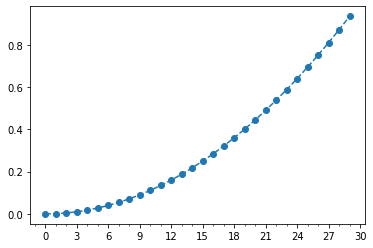

In [134]:
fig, ax = plt.subplots()
ax.plot([(xi/30)**2 for xi in range(30)],'--o')
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(3)) # 큰 눈금간격을 3으로
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(1)) # 작은 눈금간격을 1로

## 축 삭제

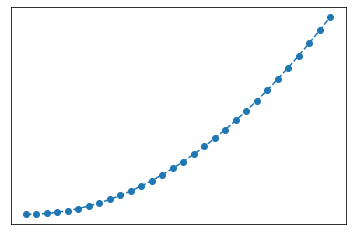

In [137]:
fig, ax = plt.subplots()
ax.plot([(xi/30)**2 for xi in range(30)],'--o')
ax.xaxis.set_major_locator(mpl.ticker.NullLocator()) # x축 눈금삭제
ax.yaxis.set_major_locator(mpl.ticker.NullLocator()) # y축 눈금삭제

## 축 범위조정 

(-5.0, 35.0)

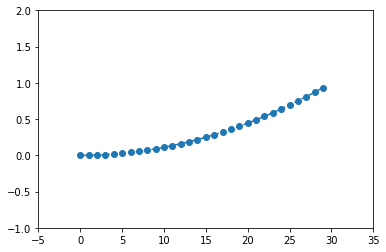

In [142]:
fig, ax = plt.subplots()
ax.plot([(xi/30)**2 for xi in range(30)],'--o')
ax.set_ylim(-1,2) 
ax.set_xlim(-5,35)
#plt.ylim(-1,2)
#plt.xlim(-5,35)

## gcf, gca

`-` gcf

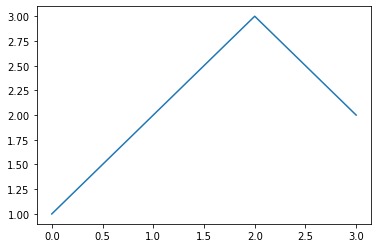

In [144]:
plt.plot([1,2,3,2])
fig = plt.gcf()

In [145]:
fig.suptitle('suptitle')

Text(0.5, 0.98, 'suptitle')

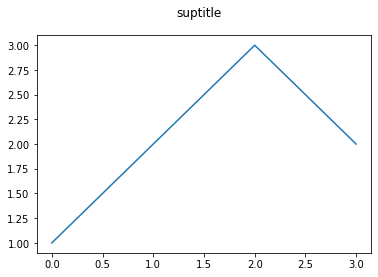

In [146]:
fig

`-` gca

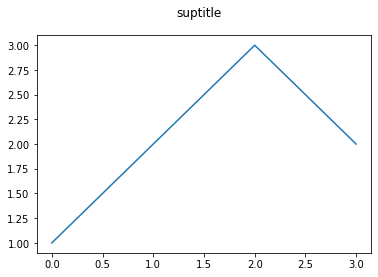

In [147]:
fig

In [148]:
ax = fig.gca()

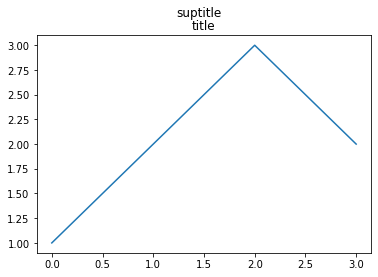

In [149]:
ax.set_title('title') 
fig